# Neural Networks


## Neural Networks

04/20/20

Andreas C. Müller


The role of neural networks in ML has become increasingly
important in recent years.
We will only go through some relatively simple variants, and
discuss how to implement them.
I highly recommend you take a full course on neural
networks, though I know they are a bit hard to get into.

In particular we will only talk about supervised
feed-forward neural networks, both the standard fully
connected variants and convolutional neural networks. We'll
not discuss recurrent neural networks or LSTMs or anything
more complex.

FIXME needs wayyy more polish!
FIXME now that eager mode is default, do we want to talk about graphs that much?
FIXME weird order of slides / topics
FIXME better explanation of early Stopping as regularizer
FIXME in two moons: just go wider before going deeper. Example of more hidden units than features.
FIXME explicitly say f and g are relu /softmax on slide with formula / nonlinearity
FIXME explain neuron and unit are synonymous
FIXME introduce words forward and backward param_mlpclassifier__alpha
FIXME Move keras from next lecture to this lecture, clean up this leacture. get rid of graph stuff?

## History

- Nearly everything we talk about today existed ~1990

- What changed?

  – More data

--

  – Faster computers (GPUs)

--

  – Some improvements:
    - relu
    - Drop-out
    - adam
    - batch-normalization
    - residual networks



For some reason, whenever anyone talks about neural
networks, they also talk about history, so here's a very
brief history of neural nets.
While there was a big boom in use of neural nets, say in the
last 9 years, many of the methods are actually from the
1990s, so much older than random forests of SVMs.
There are two things that people say fundamentally changed
the usefullness of neural nets:
more data, and computers fast enough to process that data,
in particular using GPUs.
Actually, neural nets were kind of successful in the 1990s
already, Yann LeCun's
convolutional networks were used to reach checks
automatically in ATMs.
That worked well because for digit recognition we had enough
traning data becaus the variety was "small" enough.
For natural images or audio, the variety in the data is much
much larger, and so we need much larger datasets to learn
neural networks from those.
And using these larger datasets was not possible to collect
in the 90, and not feasible to learn on without fast GPUs.
For other datasets, like tabular data as we saw it before in
this class, which have been the most popular domain of
machine learning for a long time, there is often not enough
data available for neural nets to work, and so people were
very skeptical of them for a long time.

Because neural networks were so successful recently, there
has been a giant amount of research around them, and that
resulted in many important improvements like the use or relu
units, drop out, adam, batch normalization and residual
networks. We'll talk about these improvements
today and next time as well.

The dramatic shift that we've seen is mostly due to the availability of data and processing power, though.

## Logistic regression as neural net

.center[
![:scale 40%](images/log_reg_nn.png)
]



Before I introduce you to neural networks, I want to
introduce you to how people often draw neural networks, but
drawing a model that you already know, binary logistic
regression, in the same way. This drawing basically only
encodes the prediction process, not the model building or
fitting process.

Often networks are drawn as circles, which basically
represent numbers.
So here, I drew a four-dimensional input vector, x[0] to
x[3]. For each input, we drew a little circle representing
this number.
In binary logistic regression, the output is computed as the
inner product of the input vector and a weight vector w, or
in other words a weighted sum of the x's, weighted by the
ws. So each of these arrows corresponds to weighting the
input by an w_i and then they are all added up to the output
y. In logistic regression we usually compute the output y as
the probability, given by the logistic sigmoid of this
weighted sum. This is not drawn but kind of implicit in the
picture.
I also didn't draw the bias here, which is also added to the
final sum.
So to summarize, circles mean numbers, and arrows mean
products between what's on the origin of the arrow, and a
coefficient that's part of the model. And arrows into
circles mean sums, and they often imply some non-linear
function like the logistic sigmoid.

#Basic Architecture

.center[
![:scale 50%](images/nn_basic_arch.png)
]

$ h(x) = f(W_1x+b_1) $

$ o(x) = g(W_2h(x) + b_2) $


So now let's look at what a neural network is. It's very
similar to the logistic regression, only applied several
times.
So here I drew three inputs x, from which we compute
weighted sums. But now there is not only a single output,
but we compute several intermediate outputs,
the hidden units.
Each of the hidden units is a weighted sum of the inputs,
using different weights. Each hidden unit corresponds to an
inner product with a weight vector, so all together they
correspond to multiplying the input by a matrix, here a 3 by
4 matrix.
We also add a bias for each of the hidden units, so a vector
of dimension 4 for all of them. Then, we basically repeat
the process and compute again weighted sums of the hidden
units, to arrive at the outputs. Here this would correspond
to multiplying by a 4 by 2 matrix, and adding a vector of
dimension 2. Then we could apply for example a logistic
sigmoid or softmax to get a classification output.
So we basically do two matrix multiplications. If that was
all, we could simplify this by just multiplying the matrices
together into a single matrix, and we would just have a
linear model. But the interesting part is that in the hidden
layer, after we compute the weighted sum, we apply a
non-linear function, often called activation function or
just nonlinearity. That is what makes this whole function
non-linear, and allows us to express much more interesting
relationships. You can think of this as doing logistic
regression with learning non-linear basis functions. The
process is written here in formulas, we take the input x,
multiply with a matrix W, add a bias b, and apply a
non-linearity f, to get h. Then we multipy h by another
matrix W', add a bias b' and apply a non-linearity g. This
looks a bit like the word2vec we had last time, though here
it's really very important to have the non-linear activation
functions. Wha we want to learn from data are the weights
and biases, so in this case a 3x4 matrix, a vector of dim 4,
a 2x4 matrix and a vector of dim 2. Each of these steps of
computation is usually called a layer. Here we have an input
layer, one hidden layer, and an output layer. The hidden
layer is called hidden because the computation is not
actually part of the result, it's just internal to the
algorithm. Though I'm drawing all these things in a similar
way, don't confuse them with graphical models, as I drew
them for latent dirichlet allocation.
All these nodes here are completely deterministic functions,
and the graph just illustrates very simple computations.

## More layers

.center[
![:scale 60%](images/nn_manylayers.png)
]


- Hidden layers usually all have the same non-linear
  function, weights are different for each layer.

- Many layers → “deep learning”.
- This is called a multilayer perceptron, feed-forward neural network, vanilla feed-forward neural network.

- For regression usually single output neuron with linear
activation.
- For classification one-hot-encoding of classes, n_classes
many output variables with softmax.

We can have arbitrary many layers in a neural network, and
more layers or more units allow to express more complex
functions. And the term deep-learning is referring to neural
nets with many hidden layers. This type of network is called
a multilayer perceptron, basically because it has more than
one layer of computation.

For the output, it functions similar to linear models. You
can do binary classification with a single output, you can
do multi-class classification with a softmax like in
multinomial logistic regression, or you can have just a
single output for regression. All of the hidden layers
usually have the same non-linear function f, but that's not
usually the same as the output function.

#Nonlinear activation function

.center[
![:scale 65%](images/nonlin_fn.png)
]


The two standard choices for the non-linear activation
function are shown here, either the tanh, which is the more
traditional choice, or the rectified linear unit or relu,
which is more commonly used recently. Tanh basically
squashes everything between -inf and +inf to -1 and 1 and
saturates towards the infinities. The rectified linear unit
just is constant zero for all negative numbers, and then the
identity. One of the reasons given for preferring the relu
unit is that the gradient of tanh is very small in most
places, which makes it hard to optimize.

#Supervised Neural Networks

- Non-linear models for classification and regression

- Work well for very large datasets

- Non-convex optimization

- Notoriously slow to train – need for GPUs

- Use dot products etc require preprocessing, → similar to
SVM or linear models, unlike trees

- MANY variants (Convolutional nets, Gated Recurrent neural
networks, Long-Short-Term Memory, recursive neural
networks, variational autoencoders, generative adverserial
networks, deep reinforcement learning, ...)




I want to give you a brief overview of what these models are
for before we dive into more details. These are non-linear
models that can be used for classification and regression.
They can also be used for much more, but we'll not talk
about this in this class. They are what's called universal
approximators, so they can model, i.e. overfit any function,
like trees or RBF Kernel SVMs. They work particularly well
for very large datsets, usually with at least tens of
thousands of samples, or even millions of examples. They
require solving a non-convex optimization problem, so the
solution is dependent on initialization and the method of
optimization you choose. They are notoriously slow to traing
compared to many other models, requiring GPUs. There is alot
of fast implementations of neural networks on GPUs out
there, but scikit-learn doesn't contain any. We'll use
scikit-learn a little bit for illustration purposes, but you
probably don't want to use it on any real problem. We'll
discuss some other libraries that you can use instead,
though, in particular tensorflow and keras. You can run
these on your laptop, but to really get the benefit of GPUs
you need to have the right hardware, so you can either use a
cluster or GPU cloud resources or maybe your gaming PC with
an Nvidia card.

State of the art models in computer vision and audio take
days or even weeks to train, often on multiple GPUs. In a
sense, neural networks are quite related to linear models,
as we'll see in a bit, working also with dot products. So
similar to those, you need to preprocess your data to be
continuous and scaled. Neural networks, probably because of
the non-convex optimization, are actually much more
sensitive to scaling than linear models in practice.


And finally, as I said earier, there are many many different
variants of this. Neural networks, or deep learning, is
really an umbrella term that describes a large number of
different architectures and algorithms. The things that
we'll talk about first are often called vanilla neural
networks, or multilayer
perceptron.
And the zoo of neural network types is growing all the time,
given the amount of research in that area. The only other
type we'll cover is convolutional neural nets, which we'll
cover next time. Other common types include recurrent neural
networks like LSTMs, there's recursive neural networks, GANs
that are all the rage because they can generate nice faces
and cats and photos from drawings, neural turing machines
that can learn algorithms, and of course deep
reinforcement learning that can play better go than any
human.

## Training Objective

$$ h(x) = f(W_1x+b_1) $$
$$ o(x) = g(W_2h(x)+b_2) = g(W_2f(W_1x + b_1) + b_2)$$

$$ \min_{W_1,W_2,b_1,b_2} \sum\limits_{i=1}^N l(y_i,o(x_i)) $$

$$ =\min_{W_1,W_2,b_1,b_2} \sum\limits_{i=1}^N l(y_i,g(W_2f(W_1x+b_1)+b_2)$$

- $l$ Squared loss for regression. Cross-entropy loss for classification



So how are we going to learn these parameters, these weights
and biases for all the layers? If we did logistic
regression, this would be relatively simple. We know it's a
convex optimization problem, to optimize the log-loss, so we
can just run any optimizer, and they'll all come to the same
result.

For the neural network it's a bit more tricky. We can still
write down the objective. So let's say we have a single
hidden layer, then the hidden layer is x multiplied by W
with bias b added, and then a non-linearity f, and the
output o(x) is another matrix multiplication, another bias,
and the output non-linearity like softmax.

If we want to find the parameters W1,w2,b1,b2, we want to do
empirical risk minimization, so for classification we want
to minimize the cross-entropy loss for classification of the
outputs o(x) given the ground thruth y_i over the training
set. For regression we'd just use the square loss instead.

FIXME why W1/W2 here and before W and W'?
We could also add a regularizer, like an L2 penalty on the
weights W if we wanted, though that's not necessarily as
important in neural networks as in linear models. Generally,
this is the same approach as for linear models, only the
formula for the output is more complicated now.

In particular this objective is not convex, so we can
basically not hope to find the global optimum. But we can
still try to find "good enough" values for the parameters w
and b by running an optimizer. We could use a gradient based
optimizer like gradient descent, or newton, or conjugate
gradient of lbfgs on this objective and this will yield a
local optimum, but not necessarily a global one, and that's
basically the best we can do.

Because you have to care about this optimization more than
for many other models I'll go into a bit more details about
how this works. Let me know if anything is unclear.

## Backpropagation

Need $\frac{\partial l(y, o)}{\partial W_i} $ and $\frac{\partial l(y, o)}{\partial b_i}$

$$ \text{net}(x) := W_1x + b_1 $$

.center[![:scale 70%](images/backprop_eqn.png)]




To run an optimizer, we do need to compute the gradients for
all our parameters though, and that's a bit non-obious.
Luckily there's a simple algorithm to do that, called
backpropagation, that is computationally very simple. You
probably heard the name backpropagation before, and often
people make a big deal out of it, but it is not actually a
learning algorithm or anything like that, it's just a nice
way to compute the gradients in a neural network. And back
propagation is basically just a clever application of the
chain rule for derivatives. So let's say we want to get the
gradients for the first weight matrix W1, so del o/del w1.
If you try to write this down directly from the formula for
the network it's a bit gnarly, but using the chain rule we
can simplify this a bit.
Let's define net(X) as the first hidden layer before the
non-linearity. Then we can apply the chain rule (twice) and
we see that we can write the gradient as a product of three
terms, the input to the first layer, x, the gradient of the
non-linearity f, and the gradient of the layer after W1,
namely h. So to compute the gradient of the first weight
vector, we need the activation/value of the layer before,
and the derivative of the activation after.
FIXME backpropagation image?

When computing the predictions, we compute all the
activations of the layers, and we get an error. So we
already have all these values. So to compute the gradients,
we can do a single sweep, a backward pass, from the output
to the input, computing the derivatives using the chain
rule.

It's probably educational to go through the details of this
once yourself, deriving this starting from the chain rule.
But you can also just look it up in the deep learning book I
linked to. I don't think it's gonna be instructive if I try
to walk you through the algebra.

Anyone see a problem with this? In particular the gradient
of the non-linearity?

#But wait!

.center[
![:scale 75%](images/relu_differentiability.png)
]



So if you're a mathematician you might be slightly confused
now. I showed you these non-linearities earlier, the relu
and the tanh. But the relu is not actually differentiable.
it's differentiable everywhere but at zero. So formally,
there is no gradient, and we can't do gradient descent. We
can do what's called "subgradient" descent, though, which
only requires a subgradient. At every point where there's a
gradient, we just use the gradient, and if you hit the zero,
you can actually pick any gradient that is "below the
function" here; any tangent direction is fine. But in
reality, you're never going to hit the zero, computing with
floating point numbers, so we really don't have to worry
about it. And just to point this out again, backpropagation
is not an optimization algorithm, it's a way to compute
gradients. We still need to think about what optimizer to
use to actually find the minimum given the gradients. So how
could we do that? Gradient descent for example(FIXME gave
answer earlier)

#Optimizing W, b

Batch

$$ W_i \leftarrow W_i - \eta\sum\limits_{j=1}^N \frac{\partial l(x_j,y_j)}{\partial W_i} $$


--

Online/Stochastic

$$ W_i \leftarrow W_i - \eta\frac{\partial l(x_j,y_j)}{\partial W_i}$$



--

Minibatch

$$ W_i \leftarrow W_i - \eta\sum\limits_{j=k}^{k+m} \frac{\partial l(x_j,y_j)}{\partial W_i}$$




So doing standard gradient descent, we would update a weight
matrix W_i but using the old W_i and taking a gradient step,
so subtracting the gradient of the loss wrt the paramters,
summed over the whole training set, times some learning
rate. The problem with this is that it's quite slow.
Computing all these gradients means that we need to pass all
the examples forward through the network, make predictions,
and then do a backward pass with backpropagation. That's a
lot of matrix multiplications to do a single gradient step,
in particular given that we want to do this for very large
datasets. So what we can do to speed this up is doing a
stochastic approximation, as we already saw for linear
models, doing stochastic gradient descent aka online
gradient descent. Here, you pick a sample at random, compute
the gradient just considering that sample, and then update
the parameter. So you update the weights much more often,
but you have a much less stable estimate of the gradient. In
practice, we often just iterate through the data instead of
picking a sample at random. And as with linear models, this
is much faster than doing full batches for large datasets.

However, it's less stable, and also it doesn't necessarily
use the hardware in the best way. So we can do a compromise
in where we look at mini-batches of size k, usually
something like 64 or 512. So we look at k samples, compute
the gradients, average them, and update the weights. That
allows us to update much more often than looking at the
whole dataset, while still having a more stable gradient,
and better being able to use the parallel computing
capabilities of modern CPUs and GPUs. This is what's used in
practice basically always. The reason why this is faster is
basically that doing a matrix-matrix multiplication is
faster than doing a bunch of matrix-vector operations.

In principle we could also be using smarter optimization
methods, like second order methods or LBFGS, but these are
often not very effective on these large non-convex problems.
One, called levenberg-marquardt is actually a possibility,
but it's not really used these days.

## Learning Heuristics

- Constant $\eta$ not good

- Can decrease $\eta$

- Better: adaptive $\eta$ for each entry if W_i

- State-of-the-art: adam (with magic numbers)

- https://arxiv.org/pdf/1412.6980.pdf

- http://sebastianruder.com/optimizing-gradient-descent/


As with linear models, tuning the learning rate is a major
issue here, so finding a good value of eta.

Actually, having a constant learning rate during the whole
learning process is not good. Instead, we want to make
bigger steps in the beginning and smaller steps in the end,
so that's what people used for many years. Even better is to
have a different learning rate for each parameter that we're
tuning, based on past gradient steps. There's many
heuristics for that, and it's somewhat related to diagonal
approximations of second order methods. There's adagrad,
adadelta, rmsprop and may more. When I first started doing
neural nets, I actually used something similar, Rprop, from
the 90s. Arguably the state of the art for these
per-parameter adaptive learning rates is adam. It has some
magic numbers in it but it seems to work well in practice.
Rmsprop is also used by some.

In addition to the speed of convergence, there's the
addition issue that you will get different solutions
depending on how you pick the learning rates, as
it's a non-convex problem.

While there is a whole lot of literature on this topic, it's
really hard to do actual theory about this, as it's
fundamentally impossible to actually find a global optimum.
So nearly all of these strategies are heuristics, that have
just proven well to work in practice.

## Picking Optimization Algorithms

- Small dataset: off the shelf like l-bfgs

- Big dataset: adam / rmsprop

- Have time & nerve: tune the schedule



So for large datasets, something like adam or rmsprop is
probably a good idea.
However, if you have a very small datasets, you might just
try an off-the-shelf solver like lbfgs. Lbfgs basically uses
an estimate of the hessian and is originally meant for
convex problems, but it also works reasonably well for
non-convex problems. And if you have time and nerve, you can
try tuning a learning rate or learning rate schedule
yourself, and that can give better results than using one of
the heurstics, but only after putting in some effort. One
other commonly used strategy is using a constant learning
rate for all weights, and half it once learning slows down.
These are basically the options that scikit-learn gives you,
with the default being adam. For some of the toy datasets
we'll use lbfgs instead, which is more likely to give good
results if it's feasible to run a large number of
iterations. So let's start using these models now, for now
with scikit-learn.


## Neural Nets in Practice

#Neural Nets with sklearn

.center[
![:scale 45%](images/nn_sklearn.png)
]

.smaller[
```python
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))
```
```
1.0
0.88
```
]



So lets start with some toy data. Here's my favorite two
moons dataset.

- Don’t user sklearn for anything but toy problems in
neural nets.

#Random State

.center[
![:scale 75%](images/random_state.png)
]



This net is also way over capacity and can overfit in many
ways.
Regularization might make it less dependent on
initialization.

## Hidden Layer Size

.smaller[
```python
mlp = MLPClassifier(solver='lbfgs', hidden_layer_size=(5,), random_state=10)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))
```
```
0.93
0.82
```
]
.center[
![:scale 50%](images/hidden_layer_size.png)
]




By default in scikit-learn, it has a single hidden layer
with 100 units. Hidden layer size is a tuple. The number of
entries gives you the number of hidden layers, and each
integer gives you the size of the layers. So here, this one
has a single hidden layer of size 5.

If I didn't put the comma here, it will give me an error,
because then it'll just pass 5, not the tuple of length 1
with a 5 in it.

Each unit corresponds to a different part of this line
segment. And if you add more units you get more smooth line
segments.

## Hidden Layer Size

.smaller[
```python
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10, 10),
                    random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))
```
```
0.97
0.84
```
]
.center[
![:scale 48%](images/hidden_layer_size_2.png)
]



Instead of the layer wide, we can add more hidden layers. So
here, I created 3 hidden layers each of size 10. This is one
of the main ways to control complexity in the model.

The question is, does each hidden layer correspond to some
representation of the data or a learned feature?

Yeah, that definitely makes sense to think of the
activations as features. But these are learned in a very
supervised way, we're learning these to classify. So
basically, the idea is that the first layer will be more
sort of related to what did the input look like, whereas the
last layer will look more like which class does this
represent.

#Activation Functions
.smaller[
```python
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10, 10),
                    activation='tanh', random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))
```
```
1.0
0.92
```
]

.center[
![:scale 45%](images/activation_functions_plot.png)
]



- Using tanh we get smoother boundaries

- Here actually it fits the data better.

- It might be that relu doesn’t work that well with l-bfgs or
with using these very small hidden layer sizes.

- For large networks, relu is definitely preferred.

## Regression

.center[
![:scale 55%](images/regression_plot.png)
]

.smaller[
```python
from sklearn.neural_network import MLPRegressor
mlp_relu = MLPRegressor(solver="lbfgs").fit(X, y)
mlp_tanh = MLPRegressor(solver="lbfgs", activation='tanh').fit(X, y)
```]



We can use the same neural networks for regression. We can
do this relu or tanh. Relu gives more line segments, and a
little bit more abrupt than the tanH.

Tuning the number of hidden layers in the hidden layer sizes
is kind of tricky. I want to give you some intuition about
how you might do that. So one thing definitely to think
about is representing the input. So if I have a
1000-dimensional vector, and my first hidden layer size is 2
that means the first layer would need to compress everything
in my 1000-dimensional vector into a 2-dimensional space.
And if I tried to do this, it will probably lose most of the
information. So if you want to do classification, you
usually don't want to compress down your input space too
quickly.

+++
## Complexity Control

- Number of parameters

- Regularization

- Early Stopping

- (drop-out)



These are the main ways to control complexity.

Early stopping means while you're doing gradient descent,
you're looking at a validation set, and you stop, when you
start to overfit. This is a very weird way to control
complexity from a machine learning point of view because
it's a little bit unclear what you're optimizing, but it has
been proven very successful in practice.

Basically, you don't try to find the optimum, you just do
gradient descent and get closer and closer to the optimum,
then you try to detect when are you overfitting and once
you're overfitting, you stop learning.


FIXME number of parameters calculation graph!
+++
#Grid-Searching Neural Nets

.smaller[
```python
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs",
                     random_state=1))
param_grid = {'mlpclassifier__alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(pipe, param_grid)
```]

.smaller[
```python
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__alpha",
                          values=["mean_test_score", "mean_train_score"])
res
```]


+++
.center[![:scale 50%](images/gridsearch_table.png)]

.center[![:scale 45%](images/gridsearch_plot.png)]



This is the breast cancer dataset. In orange is the training
score and in blue is the validation error.

If the alpha value is very small, you overfit perfectly. And
if you increase it, then it worsens.

But generally, having a simpler model is probably
preferable. You can also do a grid search for the hidden
layer sizes.

+++
#Searching hidden layer sizes
.smaller[
```python
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs"
                     ,random_state=1))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500,
              500)]
             }
grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)
```]
.center[![:scale 40%](images/search_hidden_layers_plot.png)]



Ideally, you can do both at once. This is mostly to
illustrate how you can grid search over the different hidden
layer sizes.

If you have a big dataset running this will probably take
too long.

+++
#Getting Flexible and Scaling Up



Now we'll look at neural nets beyond
scikit-learn.
There are two main motivations for this: scaling to
larger datasets and larger networks using GPUs, and
having more flexible ways to create the neural
network architectures.
If you want to get serious about neural nets, you are
likely to include some modifications to the standard
network. So how could you go about doing that?
+++
## Write your own neural networks
.smaller[
```python
class NeuralNetwork(object):
    def __init__(self):
        ## initialize coefficients and biases
        pass
    def forward(self, x):
        activation = x
        for coef, bias in zip(self.coef_, self.bias_):
            activation = self.nonlinearity(np.dot(activation, coef) + bias)
        return activation
    def backward(self, x):
        ## compute gradient of stuff in forward pass
        pass
```]


It’s actually pretty straight-forward to write the
prediction functions, or forward pass of a neural
network. There is matrix multiplications and
nonlinearities. It quickly becomes more complicated
when you use some of the tricks we’ll discuss today,
but even for this writing down the gradient can be a
bit tricky and something people used to get wrong all
the time.
So they came up with a trick that avoided having to
write down the gradients yourself, also known as the
backward pass.
That trick is autodiff.
+++
#Autodiff

.smaller[
```python
## http://mxnet.io/architecture/program_model.html
class array(object) :
    """Simple Array object that support autodiff."""
    def __init__(self, value, name=None):
        self.value = value
        if name:
            self.grad = lambda g : {name : g}
    def __add__(self, other):
        assert isinstance(other, int)
        ret = array(self.value + other)
        ret.grad = lambda g : self.grad(g)
        return ret
    def __mul__(self, other):
        assert isinstance(other, array)
        ret = array(self.value * other.value)
        def grad(g):
            x = self.grad(g * other.value)
            x.update(other.grad(g * self.value))
            return x
        ret.grad = grad
        return ret
```]



Here is a toy implementation of the idea behind
autodiff. It’s a class called array with some
operations such as addition of integer and
multiplication with other arrays.
It also has a method that returns the gradient called
grad. The gradient of the array is just the identity
function.
The trick is what happens with the addition and
multiplication. If you add something to an array or
you multiply two arrays, the result again is an array,
and has again a gradient. The product actually has
two gradients, one for each array involved.
The magic here is that while we are doing some
computation, we are keep track of that computation
and building up a graph of how to compute the
gradient of it.
+++
.smaller[
```python
a = array(np.array([1, 2]), 'a')
b = array(np.array([3, 4]), 'b')
c = b * a
d = c + 1
print(d.value)
print(d.grad(1))
```]
```
[4 9]
{'b': array([1, 2]), 'a': array([3, 4])}
```


On the right you can see the result of adding two
arrays and then computing the gradient at a
particular location.
FIXME the gradient of multiplication?
Any computation in the neural network is a simple
operation like a matrix multiplication, addition or nonlinearity.
If we write down the derivative of each of
these, we can keep track of our computation and
automatically get the derivative.
It’s really easy to implement but really helpful.
Keep in mind that we actually hard-code the derivative
for each operation, there is no symbolic
differentiation involved.
+++

## GPU Support
.center[
![:scale 55%](images/gpu_support.png)
]
.smallest[
- These numbers are old.
- Up-to-date graphs at https://developer.nvidia.com/deep-learning-performance-training-inference
]


An important limitation of GPUs is that they usually
have much less memory than the RAM, and memory
copies between RAM and GPU are somewhat
expensive.
+++

#Computation Graph

.center[
![:scale 35%](images/computation_graph.png)
]



Autodiff doesn’t solve all of the problems, though.
Depending on which derivations you need to
compute, you need to store different intermediate
results (the net activation in backprob for example).
Given the limited amount of memory available, it’s
important to know what to store and what can be
discarded. That requires an end-to-end view of the
computation, which can be summarized as a graph.
Then you can use knowledge about the computation
graph to decide what results to cache, what results to
throw away and when to communicate between CPU
and GPU.
Having a representation of the graph also helps with
visual debugging and understanding your network
structure. The computation graph is more complex
than the network graph because it includes
intermediate results and gradient computations.
+++
## All I want from a deep learning framework

- Autodiff

- GPU support

- Optimization and inspection of computation graph

- on-the-fly generation of the graph (?)

- distribution over muliple GPUs and/or cluster (?)

--

- Choices (right now):

  - TensorFlow

  - PyTorch / Torch

  - Chainer

  - (Theano)



So create deep learning model efficiently, I need
support for auto diff, computation on a GPGPU, and
optimization and inspection of the computation
graph.
There is some more advanced features that can come
in handy for research, like on-the-fly generation of
computation graphs, and distributing the network
over multiple GPUs or over a cluster.
At least the first three are all provided by the
TensorFlow, Theano and Torch frameworks, which
are the most established deep learning frameworks.
These don’t provide deep learning models, they are
infrastructure, more like numpy on steroids than
sklearn.
Theano was an early deep learning library for python,
but I think it has become less relevant since
tensorflow got released.
+++
#Deep Learning Libraries


- Keras (Tensorflow, CNTK, Theano)

- PyTorch (torch)

- Chainer (chainer)

- MXNet (MXNet)

- Also see:
http://mxnet.io/architecture/program_model.html




Then there are actual deep learning libraries that
provide higher level interfaces built on top of this
infrastructure.
There are a lot of these right now given the deep
learning hype, I want to point out a couple.
There is tf.learn, a high-level interface to tensorflow,
including a scikit-learn compatible API.
There’s keras, which supports both Tensorflow and
theano, there’s lasagna, which I think has seen less
activity recently, and torch.nn (lua) and pytorch
building on top of the torch framework.
Then there are two projects that are deep learning
libraries but that also come with their own framework
underneath, chainer and mxnet.
I think right now Keras with tensorflow is the most
commonly used one, and I want to go into those two
a bit more. But these all have their pros and cons.
+++

#Quick look at TensorFlow

- “down to the metal” - don’t use for everyday tasks

- Three steps for learning (originally):

  - Build the computation graph (using array operations
  and functions etc)

  - Create an Optimizer (gradient descent, adam, …)
  attached to the graph.

  - Run the actual computation.

- Eager mode (default in Tensorflow 2.0):
  - Write imperative code directly



If you want to do neural network research, if you want to
build new kinds of neural network that no one ever thought
about, then using TensorFlow might be good.

You can use TensorFlow for things that are are not neural
networks, you can just do like find elements simulations, or
you can run a linear model or some matrix factorization.

If you have a complex computation graph that you want to
optimize or if you want to compute gradients, then
TensorFlow can help you.

If you want to do this for actual learning, there are
basically three steps.

The first step is to build a computation graph. The second
step is to create an optimizer and tell the optimizer to
optimize the graph. Third, then you want to run the actual
computation.

Here, we are decoupling the building of the computation
graph, and the actual computation.

+++
.center[
![:scale 75%](images/tensor_flow_basics.png)
]



This is linear regression in TensorFlow. We have a very
simple 1D regression tasks that I created with Numpy.

+++
## PyTorch example

.tiny[
```python

dtype = torch.float
device = torch.device("cpu")
## device = torch.device("cuda:0") ## Uncomment this to run on GPU

N = 100

## Create random input and output data
x = torch.randn(N, 1, device=device, dtype=dtype)
y = torch.randn(N, 1, device=device, dtype=dtype)

## Randomly initialize weights
w = torch.randn(D_in, H, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    ## Forward pass: compute predicted y
    y_pred = x.mm(w1)

    ## Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    ## Backprop to compute gradients of w1 and w2 with respect to loss
    loss.backward()

    ## Update weights using gradient descent
    w1 -= learning_rate * w1.grad
    w1.grad.zero_()

```
]

## Don't go down to the metal unless you have to!

Don't write TensorFlow, write Keras!

Don't write PyTorch, write pytorch.nn or FastAI (or Skorch or ignite)

## Questions ?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

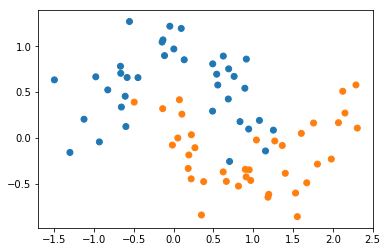

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))
xlim = plt.xlim()
ylim = plt.ylim()

In [8]:
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
X_grid = np.c_[xx.ravel(), yy.ravel()]

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.84


(-0.9822983882848756, 1.391851119202332)

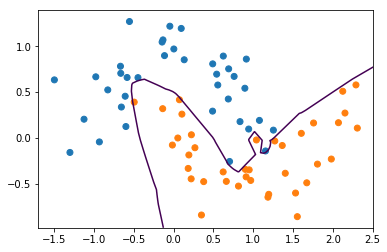

In [10]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

1.0
0.84
1.0
0.84
1.0
0.88
1.0
0.84
0.9866666666666667
0.88
1.0
0.92
1.0
0.84
0.9733333333333334
0.92
1.0
0.88


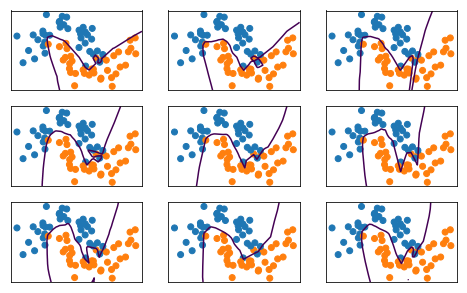

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(8, 5))
for ax, i in zip(axes.ravel(), range(10)):
    mlp = MLPClassifier(solver='lbfgs', random_state=i).fit(X_train, y_train)
    print(mlp.score(X_train, y_train))
    print(mlp.score(X_test, y_test))

    ax.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(())
    ax.set_yticks(())

In [12]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9733333333333334
0.84


(-0.9822983882848756, 1.391851119202332)

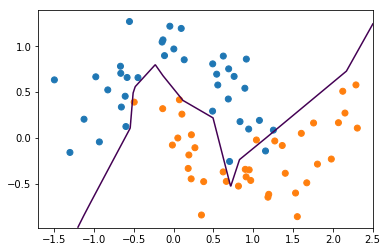

In [13]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

In [14]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), activation="tanh", random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.88


(-0.9822983882848756, 1.391851119202332)

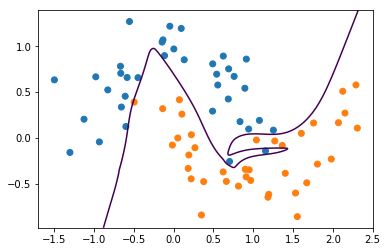

In [15]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

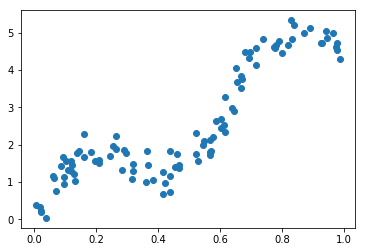

In [16]:
rng = np.random.RandomState(0)
x = np.sort(rng.uniform(size=100))
y = np.sin(10 * x) + 5 * x + np.random.normal(0, .3, size=100)
plt.plot(x, y, 'o')

In [17]:
line = np.linspace(0, 1, 100)
X = x.reshape(-1, 1)

In [18]:
from sklearn.neural_network import MLPRegressor
mlp_relu = MLPRegressor(solver="lbfgs").fit(X, y)
mlp_tanh = MLPRegressor(solver="lbfgs", activation='tanh').fit(X, y)

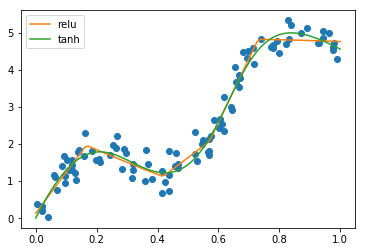

In [19]:
plt.plot(x, y, 'o')
plt.plot(line, mlp_relu.predict(line.reshape(-1, 1)), label="relu")
plt.plot(line, mlp_tanh.predict(line.reshape(-1, 1)), label="tanh")
plt.legend()

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, stratify=digits.target, random_state=0)

In [21]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.98


In [22]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9976525821596244
0.958041958041958


In [25]:
mlp = MLPClassifier(solver="lbfgs", random_state=1).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

1.0
0.958041958041958


In [26]:
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(pipe, param_grid, return_train_score=True)

In [27]:
grid.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'mlpclassifier__alpha': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ,
       1000.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__alpha",
                          values=["mean_test_score", "mean_train_score"])

/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You a

In [29]:
res

mean_test_score  mean_train_score
param_mlpclassifier__alpha                                   
0.001                              0.978873          1.000000
0.010                              0.981221          1.000000
0.100                              0.971831          1.000000
1.000                              0.978873          0.999412
10.000                             0.983568          0.990612
100.000                            0.938967          0.945427
1000.000                           0.626761          0.626761

(0.95, 1.01)

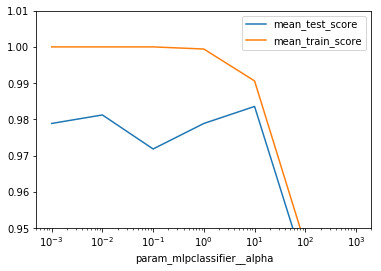

In [30]:
res.plot()
plt.xscale("log")
plt.ylim(0.95, 1.01)

In [31]:
res = results.pivot_table(index="param_mlpclassifier__alpha", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

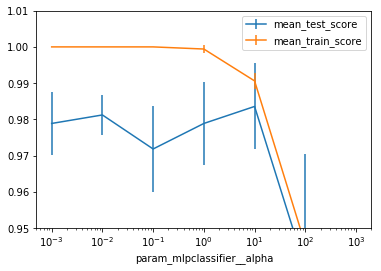

In [32]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.xscale("log")
plt.ylim(0.95, 1.01)
plt.legend()

In [33]:
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500, 500)]
             }
grid = GridSearchCV(pipe, param_grid)

In [34]:
grid.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500, 500)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__hidden_layer_sizes", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You a

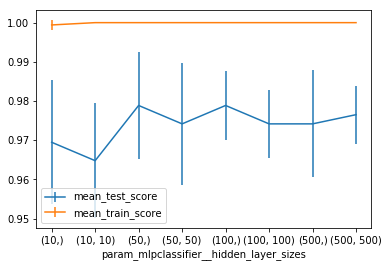

In [36]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.legend()

In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (25,), (50,), (100,) , (10, 10), (25, 25), (50, 50)]
             }
grid = GridSearchCV(pipe, param_grid, return_train_score=True)

In [50]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(10,), (25,), (50,), (100,), (10, 10), (25, 25), (50, 50)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__hidden_layer_sizes", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

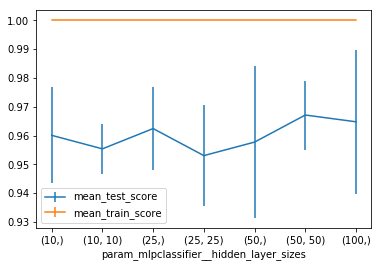

In [52]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.legend()

In [53]:
mlp = MLPClassifier(solver="lbfgs", hidden_layer_sizes=(2,), random_state=0).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9976525821596244
0.958041958041958


In [54]:
mlp.coefs_[0].shape

(30, 2)

In [55]:
hidden = np.maximum(0, np.dot(X_test_scaled, mlp.coefs_[0]) + mlp.intercepts_[0])
hidden = np.dot(X_test_scaled, mlp.coefs_[0])  + mlp.intercepts_[0]

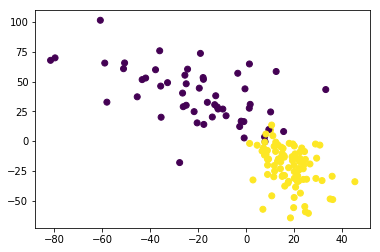

In [56]:
plt.scatter(hidden[:, 0], hidden[:, 1], c=y_test)

In [57]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.958041958041958